In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv(r"D:\DataAnalytics\dataset\Walmart.csv")
print(df.info())#displays the basic summary of the dataset(columns,datatypes,missing value...)
print(df.isna().sum())#checks for null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_id          5000 non-null   int64  
 1   customer_id             5000 non-null   int64  
 2   product_id              5000 non-null   int64  
 3   product_name            5000 non-null   object 
 4   category                5000 non-null   object 
 5   quantity_sold           5000 non-null   int64  
 6   unit_price              5000 non-null   float64
 7   transaction_date        5000 non-null   object 
 8   store_id                5000 non-null   int64  
 9   store_location          5000 non-null   object 
 10  inventory_level         5000 non-null   int64  
 11  reorder_point           5000 non-null   int64  
 12  reorder_quantity        5000 non-null   int64  
 13  supplier_id             5000 non-null   int64  
 14  supplier_lead_time      5000 non-null   

In [3]:
df.columns=df.columns.str.capitalize()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Transaction_id          5000 non-null   int64  
 1   Customer_id             5000 non-null   int64  
 2   Product_id              5000 non-null   int64  
 3   Product_name            5000 non-null   object 
 4   Category                5000 non-null   object 
 5   Quantity_sold           5000 non-null   int64  
 6   Unit_price              5000 non-null   float64
 7   Transaction_date        5000 non-null   object 
 8   Store_id                5000 non-null   int64  
 9   Store_location          5000 non-null   object 
 10  Inventory_level         5000 non-null   int64  
 11  Reorder_point           5000 non-null   int64  
 12  Reorder_quantity        5000 non-null   int64  
 13  Supplier_id             5000 non-null   int64  
 14  Supplier_lead_time      5000 non-null   

In [4]:
df=df.apply(lambda x:x.str.lower() if x.dtype==object else x)
print(df.head())

   Transaction_id  Customer_id  Product_id Product_name     Category  \
0               1         2824         843       fridge  electronics   
1               2         1409         135           tv  electronics   
2               3         5506         391       fridge  electronics   
3               4         5012         710   smartphone  electronics   
4               5         4657         116       laptop  electronics   

   Quantity_sold  Unit_price  Transaction_date  Store_id   Store_location  \
0              3      188.46   3/31/2024 21:46         3        miami, fl   
1              4     1912.04   7/28/2024 12:45         5       dallas, tx   
2              4     1377.75  06-10-2024 04:55         1  los angeles, ca   
3              5      182.31    8/15/2024 1:03         5        miami, fl   
4              3      499.28    9/13/2024 0:45         6      chicago, il   

   ...  Customer_loyalty_level  Payment_method  Promotion_applied  \
0  ...                  silver     

In [5]:
print(df.duplicated().sum())#checks for duplicate values

0


In [6]:
df['Transaction_date']=pd.to_datetime(df['Transaction_date'])
print(df['Transaction_date'].dtype)


datetime64[ns]


Create a new column Total_sales

In [7]:
df['Total_sales']=df['Quantity_sold']*df['Unit_price']
print(df['Total_sales'].head(10))

0     565.38
1    7648.16
2    5511.00
3     911.55
4    1497.84
5    5861.52
6    5714.10
7    3500.64
8    6509.92
9    3331.35
Name: Total_sales, dtype: float64


In [8]:
df=df.drop('Category',axis=1)
print(df.head())

   Transaction_id  Customer_id  Product_id Product_name  Quantity_sold  \
0               1         2824         843       fridge              3   
1               2         1409         135           tv              4   
2               3         5506         391       fridge              4   
3               4         5012         710   smartphone              5   
4               5         4657         116       laptop              3   

   Unit_price    Transaction_date  Store_id   Store_location  Inventory_level  \
0      188.46 2024-03-31 21:46:00         3        miami, fl              246   
1     1912.04 2024-07-28 12:45:00         5       dallas, tx               43   
2     1377.75 2024-06-10 04:55:00         1  los angeles, ca              411   
3      182.31 2024-08-15 01:03:00         5        miami, fl              452   
4      499.28 2024-09-13 00:45:00         6      chicago, il              412   

   ...  Payment_method  Promotion_applied       Promotion_type  \
0 

In [9]:
unique_items=df['Product_name'].unique()
print(unique_items)
category_mapping={'fridge':'appliance',
                  'tv':'appliance',
                  'washing machine':'appliance',
                  'smartphone':'electronics',
                  'laptop':'electronics',
                  'headphones':'electronics',
                  'tablet':'electronics',
                  'camera':'electronics'
                  }
df['Product_category']=df['Product_name'].map(category_mapping)
# print(df.head(30))
print(df[['Product_name','Product_category']])

['fridge' 'tv' 'smartphone' 'laptop' 'camera' 'tablet' 'headphones'
 'washing machine']
         Product_name Product_category
0              fridge        appliance
1                  tv        appliance
2              fridge        appliance
3          smartphone      electronics
4              laptop      electronics
...               ...              ...
4995       headphones      electronics
4996           laptop      electronics
4997           fridge        appliance
4998           laptop      electronics
4999  washing machine        appliance

[5000 rows x 2 columns]


1.what are the total sales across all the stores and how do they compare across locations and stores?

Total sales across all store:15263601.45
Store_location  chicago, il  dallas, tx  los angeles, ca  miami, fl  \
Store_id                                                              
1                 155013.26   129112.46        210976.79  150161.18   
2                 167474.65   142170.33        158418.98  199495.87   
3                 127012.73   131057.98        181196.49  165974.18   
4                 133773.00   107053.65        169339.28  105486.08   
5                 205576.05   205035.15        110098.20  170695.90   
6                 156598.42   146921.19        159442.22  119258.47   
7                 167388.02   122477.42        148170.92  119962.98   
8                 159070.43   143952.28        143030.64  144524.64   
9                 132797.28   187649.41        152957.36  160143.24   
10                161033.15   141762.03        163846.03  180712.63   
11                205997.80   170355.80        141204.14  130916.49   
12                145859.18   114403

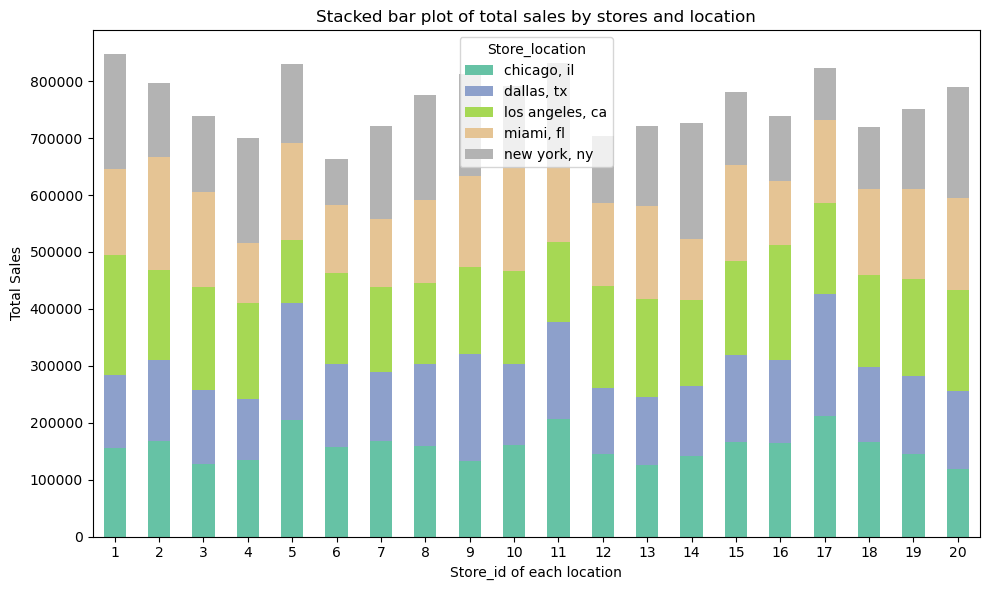

In [10]:
total_sales_all_stores=df['Total_sales'].sum()
print(f"Total sales across all store:{total_sales_all_stores}")
sales_by_loaction_and_store=df.groupby(['Store_id','Store_location'])['Total_sales'].sum().unstack(fill_value=0)
print(sales_by_loaction_and_store)
sales_by_loaction_and_store.plot(kind='bar',stacked=True,figsize=(10,6),colormap='Set2')
plt.xlabel("Store_id of each location")
plt.ylabel("Total Sales")
plt.title('Stacked bar plot of total sales by stores and location')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

2.Which products/categories contribute the most to sales in each location?

    Store_location Product_category  Total_sales
0      chicago, il        appliance   1236670.65
1      chicago, il      electronics   1920056.17
2       dallas, tx        appliance   1124151.99
3       dallas, tx      electronics   1779778.75
4  los angeles, ca        appliance   1184355.67
5  los angeles, ca      electronics   2091943.96
6        miami, fl        appliance   1194086.67
7        miami, fl      electronics   1768480.35
8     new york, ny        appliance   1146175.59
9     new york, ny      electronics   1817901.65


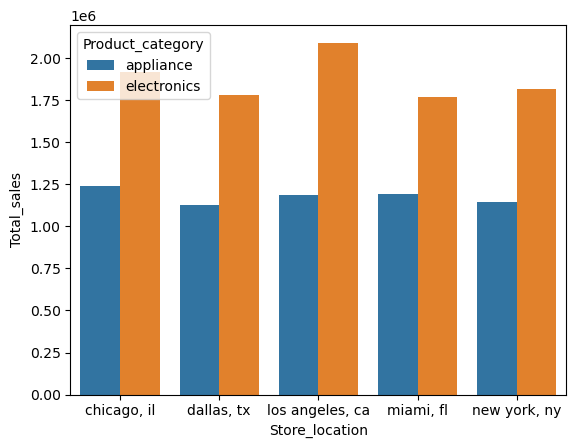

In [11]:
location_category_sales=df.groupby(['Store_location','Product_category'])['Total_sales'].sum().reset_index()
print(location_category_sales)
sns.barplot(x='Store_location', y='Total_sales',hue='Product_category',data=location_category_sales)
plt.show()

3.How do sales vary based on the weather condition?

  Weather_conditions  Total_sales
3              sunny   3979603.69
0             cloudy   3878416.82
2             stormy   3843358.52
1              rainy   3562222.42


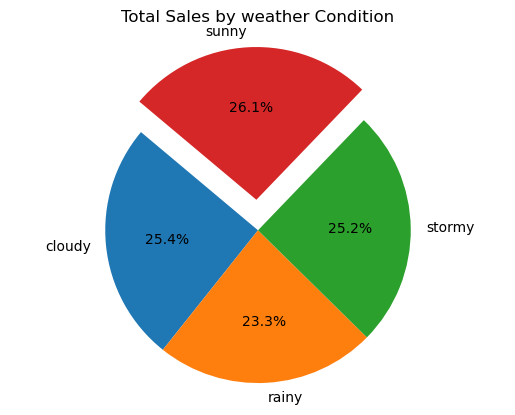

In [12]:
sales_weather_condition=df.groupby(['Weather_conditions'])['Total_sales'].sum().reset_index()
print(sales_weather_condition.sort_values(by='Total_sales',ascending=False))
myexplode=[0,0,0,0.2]
plt.pie(sales_weather_condition['Total_sales'],labels=sales_weather_condition['Weather_conditions'],autopct='%1.1f%%',startangle=140,explode=myexplode)
plt.title('Total Sales by weather Condition')
plt.axis('equal')
plt.show()

4.How do sales vary on weekday?

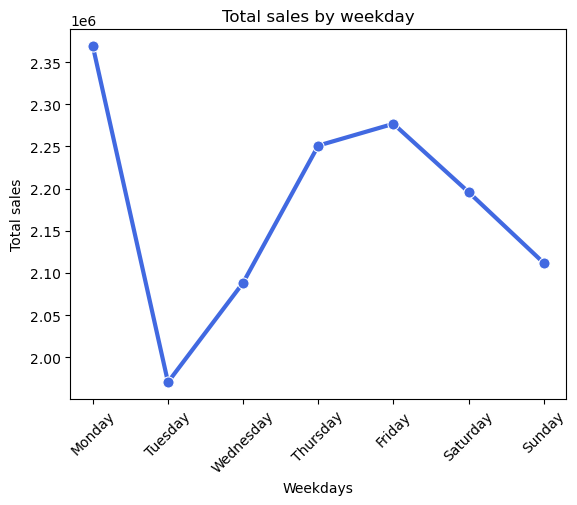

In [13]:
df['Transaction_date']=pd.to_datetime(df['Transaction_date'],errors='coerce')
df['Weekday']=df['Transaction_date'].dt.day_name()
sales_weekday=df.groupby("Weekday")['Total_sales'].sum().sort_values().reset_index()
weekday_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sales_weekday['Weekday']=pd.Categorical(sales_weekday['Weekday'],categories=weekday_order,ordered=True)
sns.lineplot(x=sales_weekday['Weekday'],y=sales_weekday['Total_sales'],marker='o',markersize=8,linewidth=3,color="royalblue")
plt.xticks(rotation=45)
plt.xlabel("Weekdays")
plt.ylabel("Total sales")
plt.title("Total sales by weekday")
sns.set_context("paper")
# sns.set_style("darkgrid")
plt.show()



5.Is there any seasonsal trend in sales? How do sales perform during peak and offpeak seasons?

year_month
2024-01    1731651.65
2024-02    1767062.38
2024-03    1833450.84
2024-04    1739800.75
2024-05    1786559.47
2024-06    1600978.97
2024-07    1878513.51
2024-08    2018315.81
2024-09     907268.07
Name: Total_sales, dtype: float64


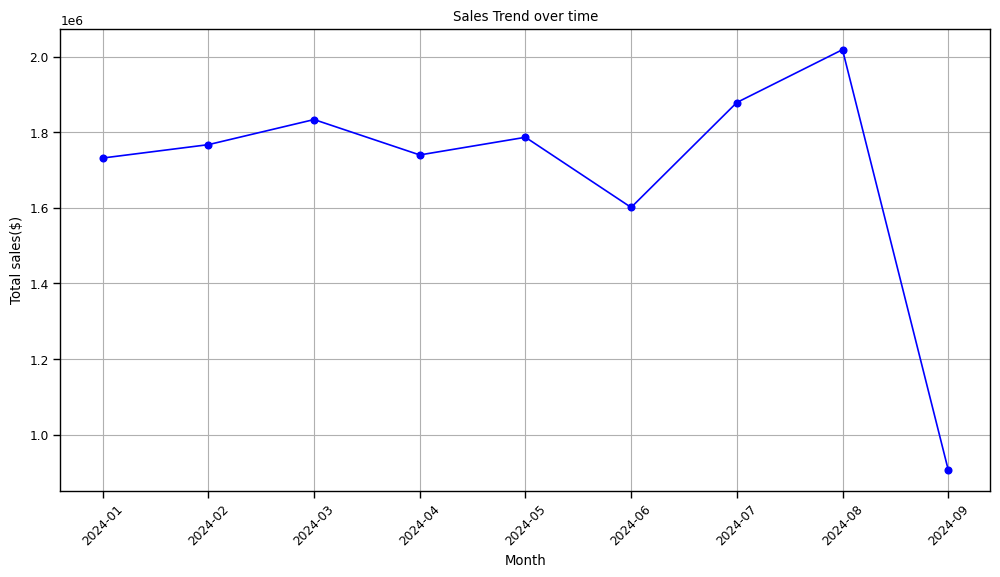

In [14]:
df["year_month"]=df['Transaction_date'].dt.strftime("%Y-%m")
monthly_sales=df.groupby('year_month')['Total_sales'].sum()
print(monthly_sales)
#convert the index to dataframe for plotting
monthly_sales=monthly_sales.reset_index()
plt.figure(figsize=(12,6))
plt.plot(monthly_sales["year_month"],monthly_sales["Total_sales"],marker='o',linestyle='-',color="b")
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Total sales($)")
plt.title("Sales Trend over time")
plt.grid(True)
plt.show()



Sales show an overall upward trend from January to August 2024, peaking in August ($2.02M). However, there is a sharp decline in June ($1.6M) and a significant drop in September ($907K). This suggests possible seasonal demand fluctuations or external factors affecting sales.

6.What are the most popular payment methods for customers and how do they correlate with sales volume

In [15]:
# calculate total sales by payment method
payment_sales=df.groupby('Payment_method')['Total_sales'].sum().reset_index()
# calculate the number of transactions for each payment method
payment_count=df.groupby('Payment_method')['Transaction_id'].count().reset_index()
#Merge total sales and transaction count into  single dataframe for comparison
payment_summary=pd.merge(payment_sales,payment_count,on='Payment_method',how='left')
payment_summary.rename(columns={'Transaction_id':'Transaction_count'},inplace =True)

   Payment_method  Total_sales  Transaction_count
0            cash   3816860.66               1246
1     credit card   3829054.57               1281
2      debit card   3652903.51               1210
3  digital wallet   3964782.71               1263
Correlation 0.764467311613974


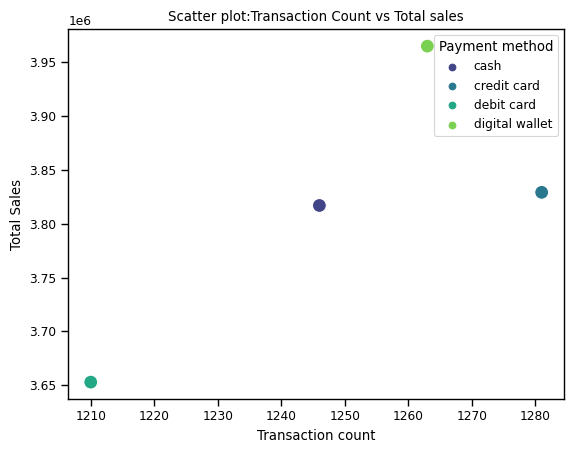

In [35]:
print(payment_summary)
correlation=payment_summary['Transaction_count'].corr(payment_summary['Total_sales'])
print("Correlation",correlation)
plt.Figure(figsize=(8,5))
sns.scatterplot(x=payment_summary['Transaction_count'],y=payment_summary['Total_sales'],hue=payment_summary['Payment_method'],palette='viridis',s=100)
plt.xlabel("Transaction count")
plt.ylabel("Total Sales")
plt.title("Scatter plot:Transaction Count vs Total sales")
plt.legend(title="Payment method")

Digital wallets generate the highest total sales ($3.96M), followed by credit cards and cash. Debit cards have the lowest sales ($3.65M). The correlation (0.76) indicates a strong positive relationship between transaction count and total sales, meaning higher transactions generally lead to higher revenue. Encouraging digital and credit card payments could further boost sales.

7.What is the impact of promotions on product sales?

sales during promotions:8062411.030000001
sales without promotions:7201190.42


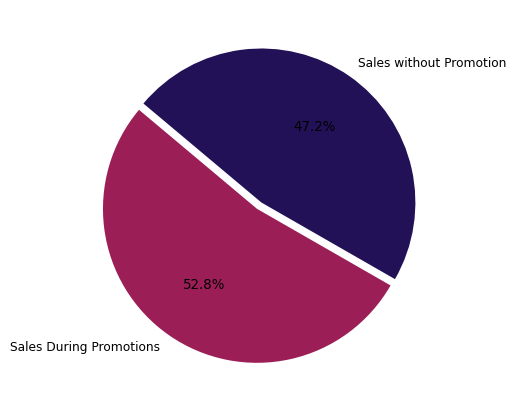

In [17]:
promotions_sales=df[df['Promotion_applied']==True]
non_promotions_sales=df[df['Promotion_applied']==False]
sales_promotions=promotions_sales['Total_sales'].sum()
sales_non_promotions=non_promotions_sales['Total_sales'].sum()
print(f"sales during promotions:{sales_promotions}")
print(f"sales without promotions:{sales_non_promotions}")
#pie chart data
labels=["Sales During Promotions","Sales without Promotion"]
sales_values=[sales_promotions,sales_non_promotions]
colors=['#9c1e56','#221157']
plt.figure(figsize=(5,5))
plt.pie(sales_values,labels=labels,autopct='%1.1f%%',colors=colors,startangle=140,explode=(0.05,0))
plt.show()

   Promotion_applied  total_sales  average_sales  Quantity_sold
0              False   7201190.42        3009.27           7134
1               True   8062411.03        3092.60           7780


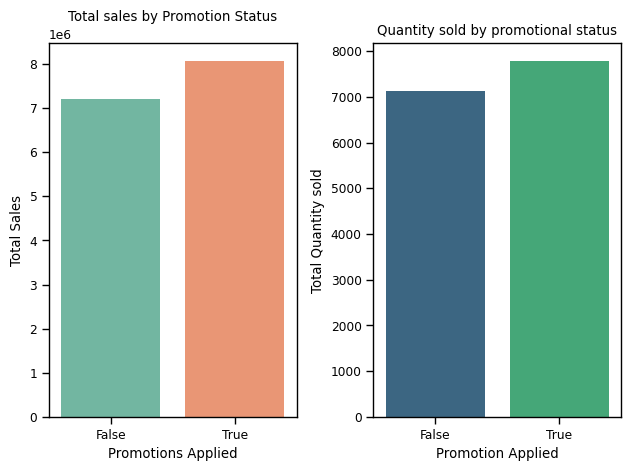

In [18]:
sales_by_promotions=df.groupby('Promotion_applied').agg(total_sales=('Total_sales','sum'),average_sales=('Total_sales','mean'),Quantity_sold=('Quantity_sold',sum) ).reset_index()
sales_by_promotions['average_sales']=sales_by_promotions['average_sales'].round(2)
print(sales_by_promotions)
plt.Figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(x='Promotion_applied',y='total_sales',data=sales_by_promotions,palette='Set2')
plt.xlabel('Promotions Applied')
plt.ylabel('Total Sales')
plt.title("Total sales by Promotion Status")
plt.subplot(1,2,2)
sns.barplot(x='Promotion_applied',y='Quantity_sold',data=sales_by_promotions,palette='viridis')
plt.xlabel('Promotion Applied')
plt.ylabel('Total Quantity sold')
plt.title("Quantity sold by promotional status")
plt.tight_layout()
plt.show()


Sales are higher when promotions are applied ($8.06M vs. $7.2M), with a slight increase in average sales per transaction ($3,092 vs. $3,009). Promotions also lead to higher quantities sold (7,780 vs. 7,134 units), indicating they effectively boost sales volume.

8.Which product needs to be restocked the most frequently? 

      Product_name  Reorder_quantity
1           fridge            134460
4       smartphone            128628
5           tablet            127840
0           camera            126096
7  washing machine            123211
6               tv            123091
2       headphones            122779
3           laptop            116480


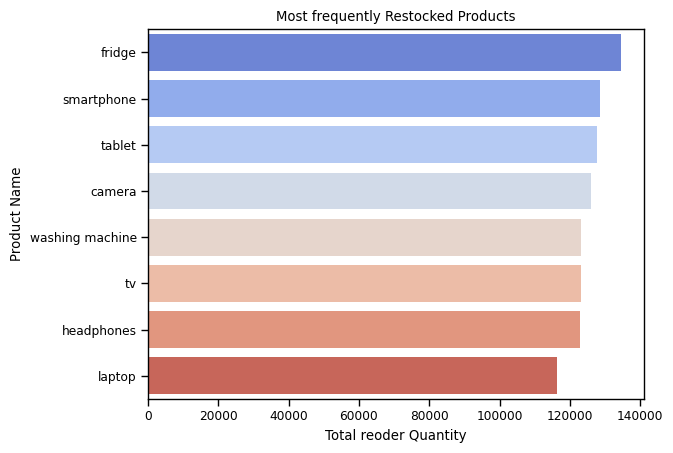

In [19]:
restock_counts=df.groupby('Product_name')["Reorder_quantity"].sum().reset_index()
most_restocked_product=restock_counts.sort_values(by="Reorder_quantity",ascending=False)
print(most_restocked_product)
plt.Figure(figsize=(12,6))
sns.barplot(x="Reorder_quantity",y="Product_name",data=most_restocked_product,palette="coolwarm")
plt.xlabel("Total reoder Quantity")
plt.ylabel("Product Name")
plt.title("Most frequently Restocked Products")
plt.show()


Fridges have the highest reorder quantity (134,460), followed by smartphones and tablets, indicating strong demand. Cameras, washing machines, and TVs also require frequent restocking. Laptops and headphones have the lowest reorder quantities, suggesting either lower demand or better stock management. Optimizing reorder strategies for high-demand products can improve inventory efficiency. 

9.Are customer with higher loyality level purchasing more frequently or in larger quantity?


In [20]:
print(df['Customer_loyalty_level'].unique())

['silver' 'gold' 'platinum' 'bronze']


  Customer_loyalty_level  purchase_frequency  unit_purchased  Total_sales
0                 bronze                1253            3714   3795198.45
1                   gold                1160            3477   3536863.54
2               platinum                1299            3896   4012963.14
3                 silver                1288            3827   3918576.32


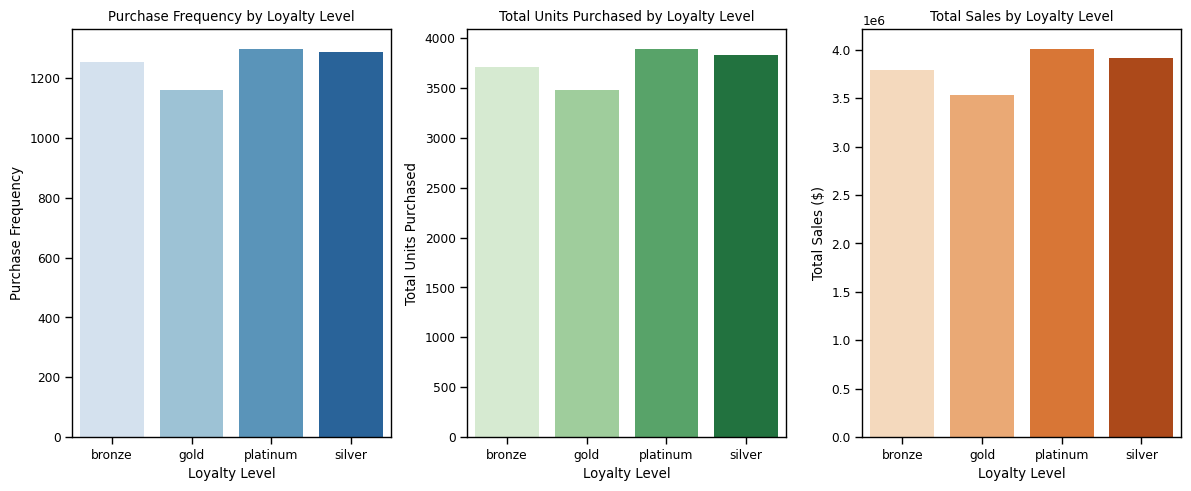

In [21]:
loyalty_analysis=df.groupby('Customer_loyalty_level').agg(purchase_frequency=('Transaction_id','count'),unit_purchased=('Quantity_sold','sum'),Total_sales=('Total_sales','sum')).reset_index()
print(loyalty_analysis)
plt.figure(figsize=(12, 5))
# Subplot 1: Purchase Frequency by Loyalty Level
plt.subplot(1, 3, 1)
sns.barplot(x='Customer_loyalty_level', y='purchase_frequency', data=loyalty_analysis, palette='Blues')
plt.xlabel('Loyalty Level')
plt.ylabel('Purchase Frequency')
plt.title('Purchase Frequency by Loyalty Level')
# Subplot 2: Total Units Purchased by Loyalty Level
plt.subplot(1, 3, 2)
sns.barplot(x='Customer_loyalty_level', y='unit_purchased', data=loyalty_analysis, palette='Greens')
plt.xlabel('Loyalty Level')
plt.ylabel('Total Units Purchased')
plt.title('Total Units Purchased by Loyalty Level')
# Subplot 3: Total Sales by Loyalty Level
plt.subplot(1, 3, 3)
sns.barplot(x='Customer_loyalty_level', y='Total_sales', data=loyalty_analysis, palette='Oranges')
plt.xlabel('Loyalty Level')
plt.ylabel('Total Sales ($)')
plt.title('Total Sales by Loyalty Level')
plt.tight_layout()
plt.show()


Platinum customers are the most valuable, with the highest purchase frequency, units purchased, and total sales. Silver customers perform similarly and could be upgraded to Platinum with targeted incentives. Bronze customers are active but likely price-sensitive, while Gold customers show the lowest engagement and may need re-engagement strategies. Focusing on retaining Platinum, upgrading Silver, and boosting Gold engagement can maximize revenue.

10.Which types of promotions yield the best sales?

In [22]:
promotion_type=df.groupby('Promotion_type').agg(promotions_type=('Promotion_type','count'),sales=('Total_sales','sum'))
print(promotion_type)

                     promotions_type        sales
Promotion_type                                   
bogo                             820   2534988.18
none                            3407  10327863.15
percentage discount              773   2400750.12


"None" (no promotion) category has the highest sales ($10.3M) and highest transaction count (3,407).This suggests that many products sell without the need for discounts or promotions.

11.how does the reoder_quantity compare to the actual demand over timeor by product category?

<Figure size 1000x500 with 0 Axes>

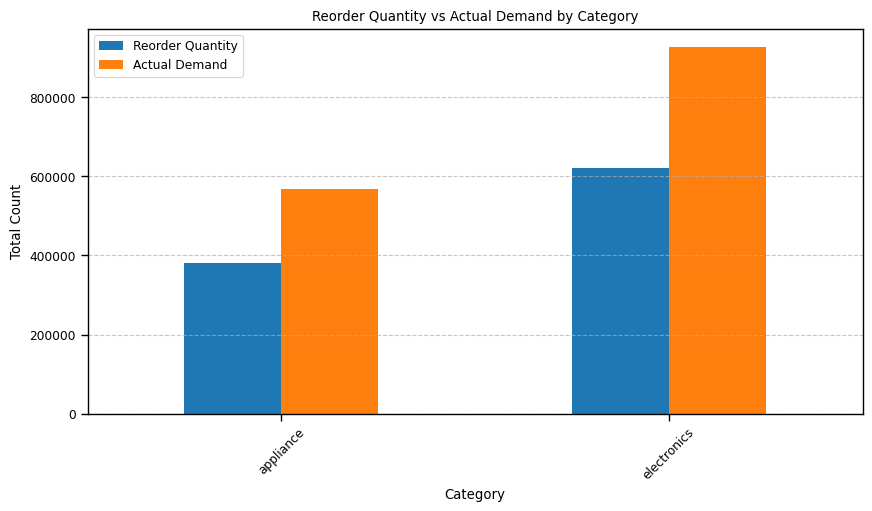

<Figure size 1000x500 with 0 Axes>

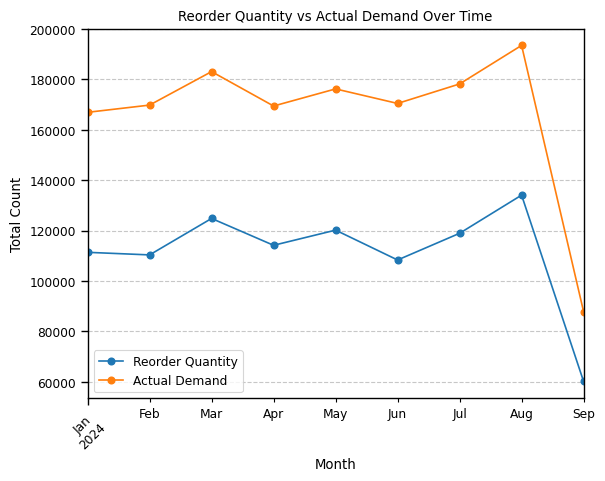

In [27]:
# print(df.info())
df["month"] = df["Transaction_date"].dt.to_period("M")
category_analysis = df.groupby("Product_category")[["Reorder_quantity", "Actual_demand"]].sum()
time_analysis = df.groupby("month")[["Reorder_quantity", "Actual_demand"]].sum()
plt.figure(figsize=(10,5))
category_analysis.plot(kind='bar', figsize=(10,5), rot=45)
plt.title("Reorder Quantity vs Actual Demand by Category")
plt.ylabel("Total Count")
plt.xlabel("Category")
plt.legend(["Reorder Quantity", "Actual Demand"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
plt.figure(figsize=(10,5))
time_analysis.plot(marker='o', linestyle='-')
plt.title("Reorder Quantity vs Actual Demand Over Time")
plt.ylabel("Total Count")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.legend(["Reorder Quantity", "Actual Demand"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Demand consistently exceeds reorder quantity across all months.Peak demand in March (183,080) and August (193,476) suggests seasonal variations.Reorder quantity is not keeping pace with actual demand, especially in high-demand months.

12.What is the average inventory level for each product and how does it correlate with sales?


In [31]:
# Calculate average inventory level per product
average_inventory = df.groupby("Product_name")["Inventory_level"].mean()

# Calculate correlation between inventory level and actual sales
correlation = df["Inventory_level"].corr(df["Actual_demand"])

# Print results
print("Average Inventory Level per Product:")
print(average_inventory)
print(f"\nCorrelation between Inventory Level and Sales: {correlation:.2f}")

Average Inventory Level per Product:
Product_name
camera             257.313694
fridge             260.789313
headphones         253.258958
laptop             249.422145
smartphone         245.268331
tablet             254.085008
tv                 255.667737
washing machine    248.600977
Name: Inventory_level, dtype: float64

Correlation between Inventory Level and Sales: 0.00


13.What is the relationship between reorder quantity and actual demand—are stores restocking efficiently?

In [34]:
correlation = df["Reorder_quantity"].corr(df["Actual_demand"])
print(correlation)
df["Restocking_efficiency"] = df["Reorder_quantity"] / df["Actual_demand"]
efficiency_stats = df["Restocking_efficiency"].describe()
print("\nRestocking Efficiency Statistics:")
print(efficiency_stats)


-0.003781465174141078

Restocking Efficiency Statistics:
count    5000.000000
mean        0.830576
std         0.510212
min         0.198020
25%         0.476749
50%         0.677356
75%         1.034533
max         3.239130
Name: Restocking_efficiency, dtype: float64


 Understocking is a major issue..The average reorder quantity is only 83% of actual demand.50% of stores reorder less than 67.74% of demand, leading to frequent stockouts.25% of stores reorder less than 47.67%, indicating severe understocking.The maximum restocking efficiency is 3.24, meaning some stores order more than 3× their actual demand.However, only 25% of stores reorder above 103.45% of demand, so overstocking is not the primary issue.
 Overall Conclusion:
Restocking is inefficient—most stores tend to underorder, while a few overorder. This can lead to frequent stockouts, lost sales, and poor inventory management.

14.Are certain products consistently understocked or overstocked based on forecast accuracy?

In [29]:
df["error"] = df["Forecasted_demand"] - df["Actual_demand"]
# Classify products as overstocked or understocked
df["stock_status"] = df["error"].apply(lambda x: "Overstocked" if x > 0 else "Understocked" if x < 0 else "Balanced")
stock_analysis = df.groupby("Product_name")["stock_status"].value_counts().unstack().fillna(0)
print(stock_analysis)


stock_status     Balanced  Overstocked  Understocked
Product_name                                        
camera                3.0        313.0         312.0
fridge                3.0        319.0         333.0
headphones            1.0        313.0         300.0
laptop                1.0        265.0         312.0
smartphone            0.0        313.0         328.0
tablet                0.0        303.0         344.0
tv                    1.0        300.0         322.0
washing machine       0.0        310.0         304.0


Many products (laptop, smartphone, tablet, TV) are understocked more frequently than overstocked.This suggests that demand is underestimated, leading to lost sales and unhappy customers.Most products have 0-3 balanced cases, meaning stores rarely reorder the exact amount needed.Headphones, washing machines, and cameras have almost equal overstocking and understocking cases.This shows inconsistency in forecasting, leading to wasted inventory.

Conclusion:
The dataset shows that stores frequently understock or overstock, with very few cases of perfect reordering.Some products (e.g., TVs, Smartphones) may have seasonal spikes in demand, which the forecast might be missing.The correlation between reorder quantity and actual demand is almost zero (-0.00378), meaning reordering does not follow demand properly.Some products are consistently understocked (e.g., tablets, smartphones), while others are frequently overstocked (e.g., headphones, washing machines). If understocking is common, it could lead to lost revenue.

conclusion2:
Walmart's data analysis reveals restocking inefficiencies, seasonal demand fluctuations, and opportunities for customer engagement improvements. Frequent understocking (especially for high-demand products like laptops and smartphones) leads to lost sales, while promotions effectively boost sales volume. Digital payments drive higher revenue, and Platinum customers are the most valuable, with Silver customers showing upgrade potential. To optimize performance, Walmart should refine demand forecasting, enhance restocking strategies, and improve customer retention efforts for sustained growth.

Suggestions
1.Identify Seasonal Demand Trends.
2.Estimate lost revenue due to stockouts and prioritize fast-selling products.
3.Implement discounts and clearance strategies for overstocked items.
4.Increase restocking frequency for high-demand products.
5.Identify slow-moving products and adjust reorder quantities accordingly.
6.Maintain a safety stock for products with unpredictable demand.
7.Enhance promotions and loyalty programs to maximize customer retention and sales.
8.Encourage digital payments to drive higher transaction volumes and sales.

